In [15]:
%matplotlib notebook

# Week 4

In [16]:
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import csv

In [32]:
data = open('../data/data.csv', 'r').readlines()
fieldnames = ['x', 'y', 'z', 'unmasked', 'synapses']
reader = csv.reader(data)
reader.next()

rows = [[int(col) for col in row] for row in reader]

xs = []
ys = []
zs = []
ss = []

sorted_x = sorted(list(set([r[0] for r in rows])))
sorted_y = sorted(list(set([r[1] for r in rows])))
sorted_z = sorted(list(set([r[2] for r in rows])))

vol = np.zeros((len(sorted_x), len(sorted_y), len(sorted_z)))
for r in rows:
    xs.append(r[0])
    ys.append(r[1])
    zs.append(r[2])
    ss.append(r[4])
    vol[sorted_x.index(r[0]), sorted_y.index(r[1]), sorted_z.index(r[2])] = r[-1]

## 1. 3D Heatmap

## **NOTE**: This demo will be slow on low-spec computers (like mine).

<IPython.core.display.Javascript object>


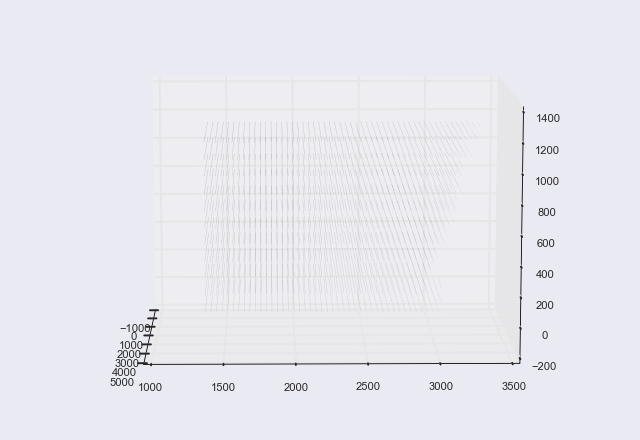

In [10]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xs,ys,zs, marker='o', s=ss, c="goldenrod", alpha=0.4)
for ii in xrange(0,360,1):
    ax.view_init(elev=10., azim=ii)
fig.show()

## 2. Heatmap after thresholding
Here, we assume that there is some level of noise, which can be defined by redefining `THRESH` below. The same heatmap is generated, but only for values where the synapse count is higher than the threshold, thus attempting to remove noise.

In [33]:
THRESH = np.mean(ss) * 3/2

19316 19316


<IPython.core.display.Javascript object>


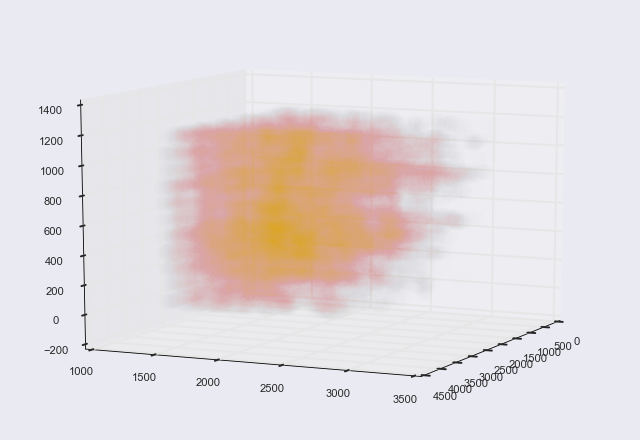

In [38]:
print len(xs), len(ss)
ss_poppable = []
for s in range(len(ss)):
    if ss[s] < THRESH:
        ss_poppable.append(s)

for s in reversed(ss_poppable):
    xs.pop(s)
    ys.pop(s)
    zs.pop(s)
    ss.pop(s)
    
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xs,ys,zs, marker='o', s=ss, c="goldenrod", alpha=0.005)
ax.view_init(elev=11., azim=25)
# fig.show()

In [31]:
ss[0]

0.0014990352637338398